<a href="https://colab.research.google.com/github/tomonari-masada/course2023-sml/blob/main/UMAP_and_TSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UMAP使用上の注意
* https://umap-learn.readthedocs.io/en/latest/parameters.html
  * パラメータ`n_neighbors`を変えると可視化がどう変わるか。
  * パラメータ`min_dist`を変えると可視化がどう変わるか。


## UMAPのインストール

In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import umap
import numpy as np
from sklearn import manifold, datasets
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_formats = {'png', 'retina'}

## digitsデータセット

In [ ]:
digits = datasets.load_digits()

In [ ]:
digits.data.shape

(1797, 64)

In [ ]:
digits.target.shape

(1797,)

## UMAPのデフォルトの設定で可視化

In [ ]:
%%time
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(digits.data)

CPU times: user 17.1 s, sys: 255 ms, total: 17.4 s
Wall time: 25.2 s


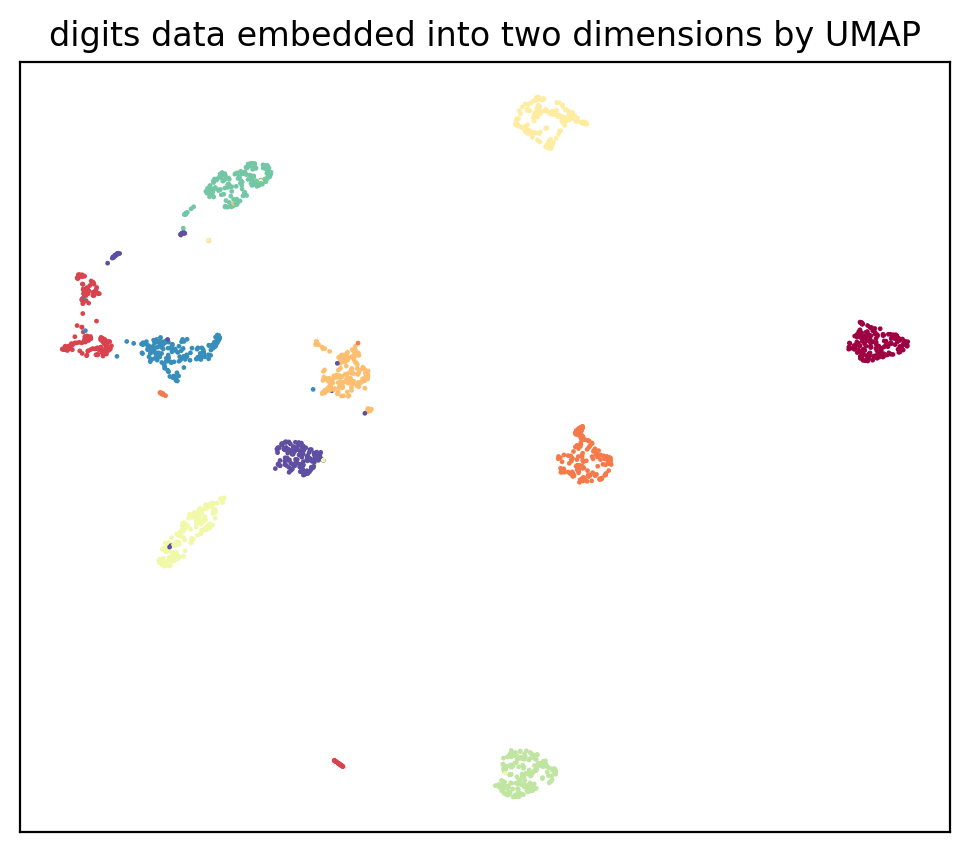

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap="Spectral", s=0.5)
plt.setp(ax, xticks=[], yticks=[])
plt.title("digits data embedded into two dimensions by UMAP");

In [ ]:
def scatter_plot(embedding, target, cmap=plt.get_cmap("tab10"), ax=None):
  for color in np.unique(target):
    indices = digits.target == color
    if ax is None:
      plt.scatter(embedding[indices, 0], embedding[indices, 1], label=color, color=cmap(color), s=3, alpha=0.5)
    else:
      ax.scatter(embedding[indices, 0], embedding[indices, 1], label=color, color=cmap(color), s=3, alpha=0.5)

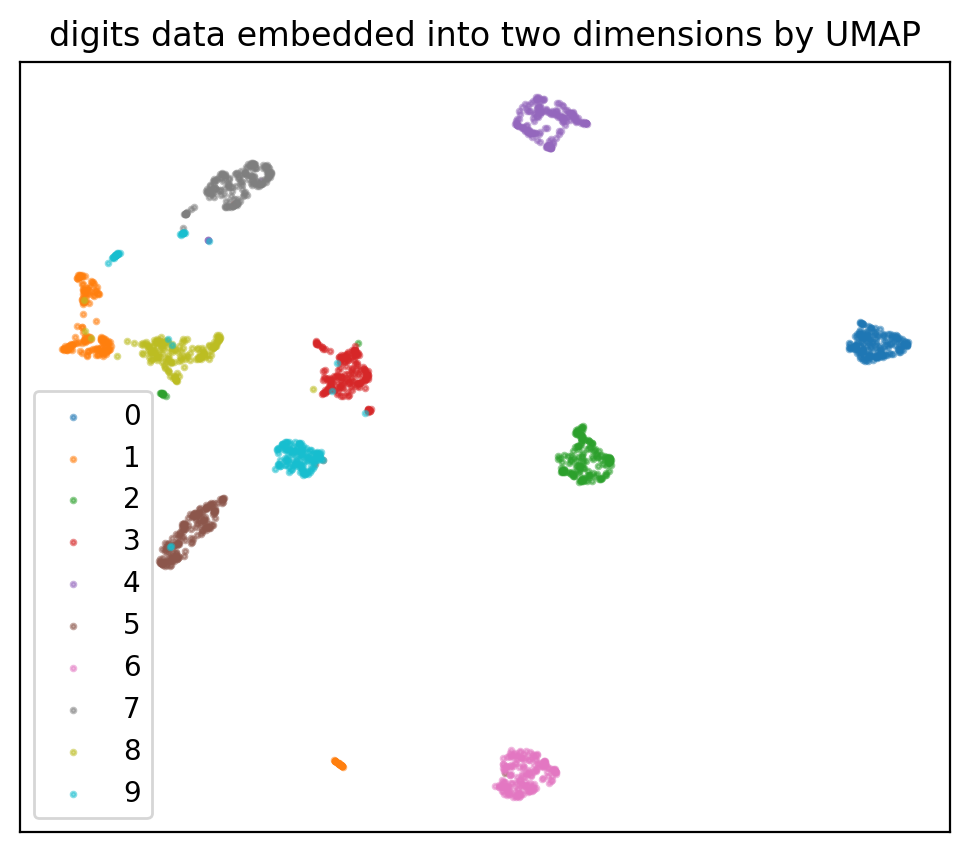

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))
scatter_plot(embedding, digits.target)
plt.setp(ax, xticks=[], yticks=[])
plt.legend()
plt.title("digits data embedded into two dimensions by UMAP");

## `n_neighbors`を変更することの効果
* デフォルトの値は15

### ヘルパ関数

In [ ]:
def draw_umap(n_neighbors=15, min_dist=0.1, title=''):
  reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist)
  u = reducer.fit_transform(digits.data);
  fig = plt.figure()
  ax = fig.add_subplot(111)
  scatter_plot(u, digits.target, ax=ax)
  plt.setp(ax, xticks=[], yticks=[])
  plt.legend()
  plt.title(title, fontsize=15);

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited at iteration 81 with accuracies 
[3.13731231e-06 4.13116952e-06 3.09454917e-05 3.60917485e-05]
not reaching the requested tolerance 5.97536563873291e-06.
Use iteration 81 instead with accuracy 
1.8576430509701892e-05.

  _, diffusion_map = lobpcg(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[3.13731285e-06 4.13117003e-06 3.09454925e-05 3.60917474e-05]
not reaching the requested tolerance 5.97536563873291e-06.
  _, diffusion_map = lobpcg(


CPU times: user 1min 27s, sys: 1.35 s, total: 1min 28s
Wall time: 1min 19s


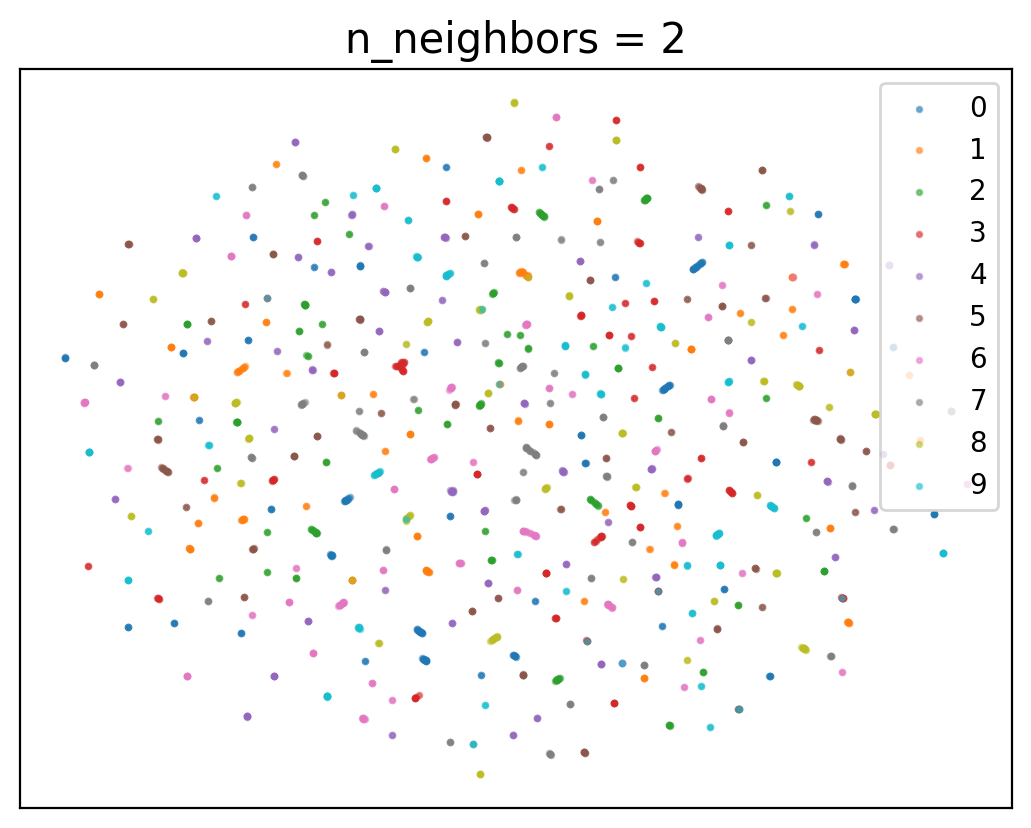

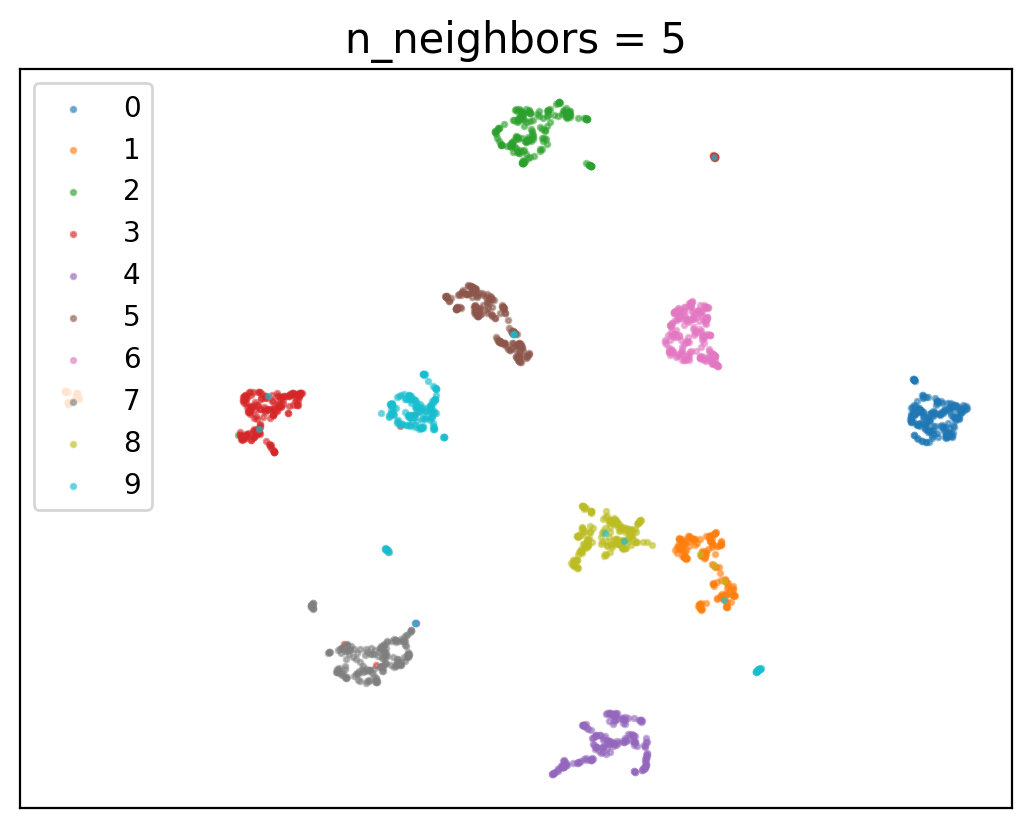

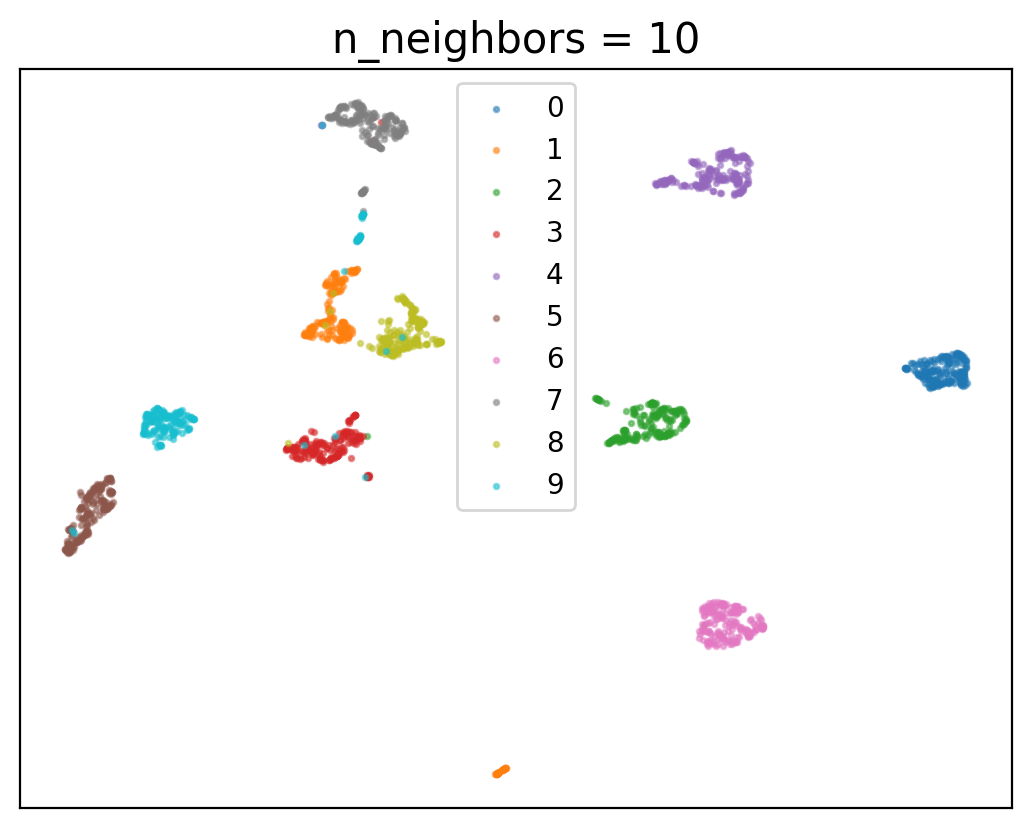

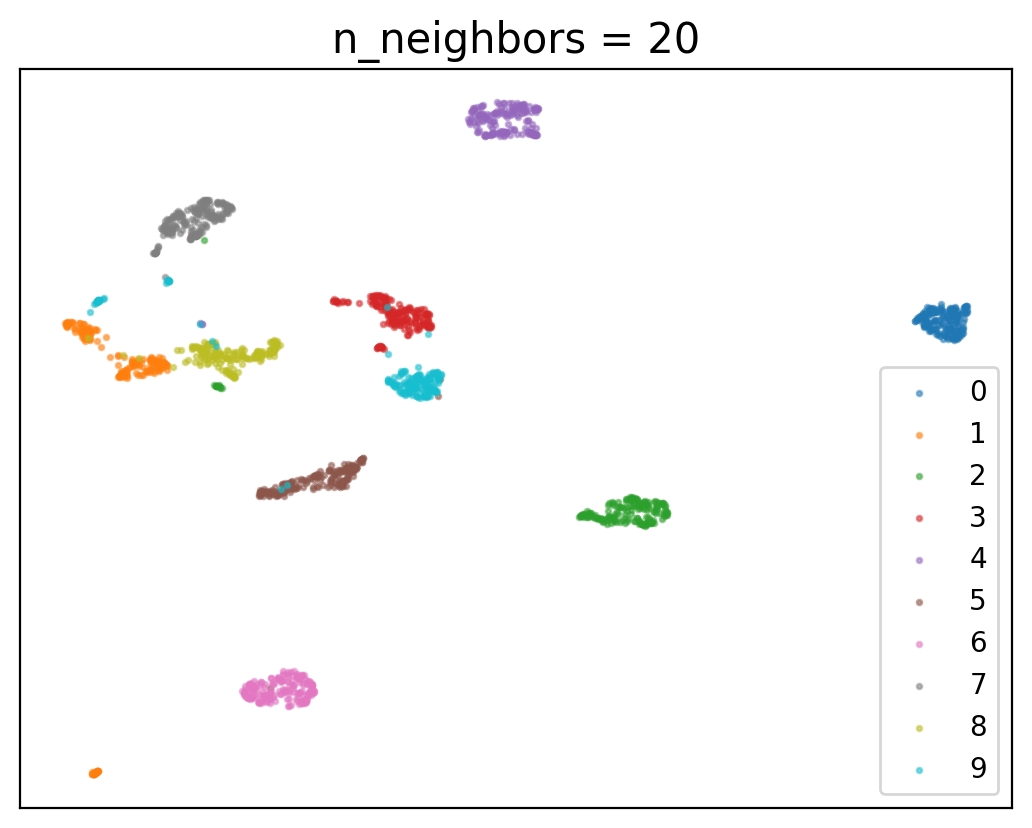

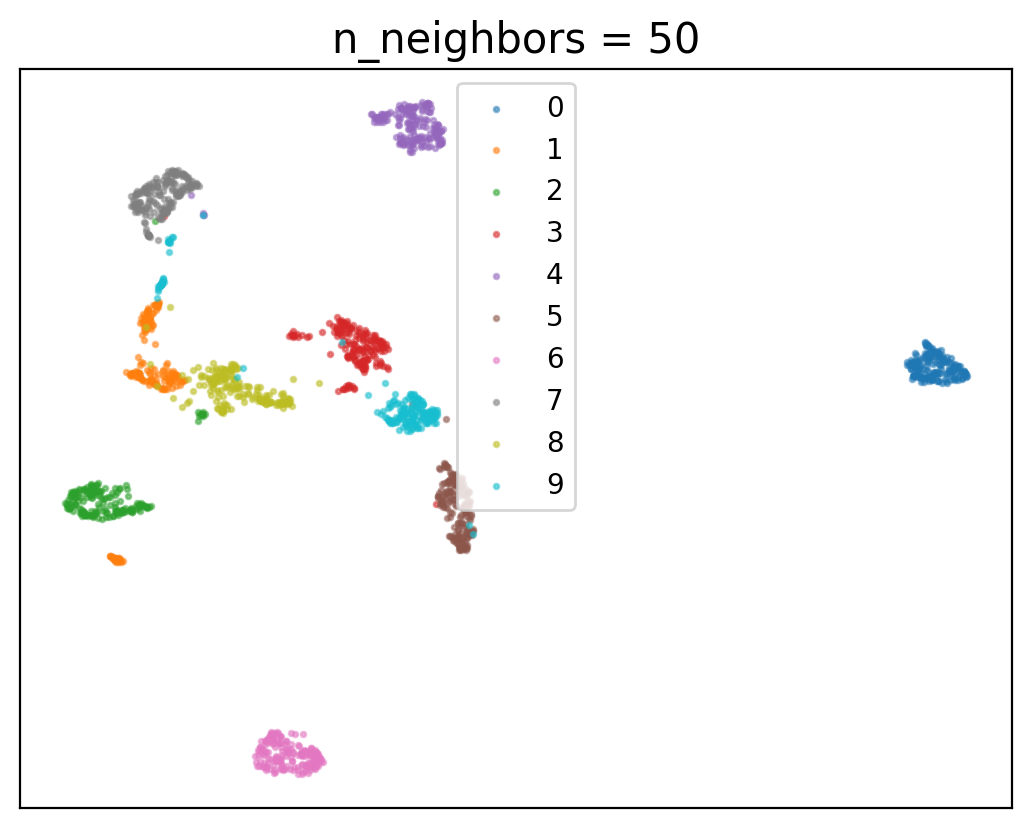

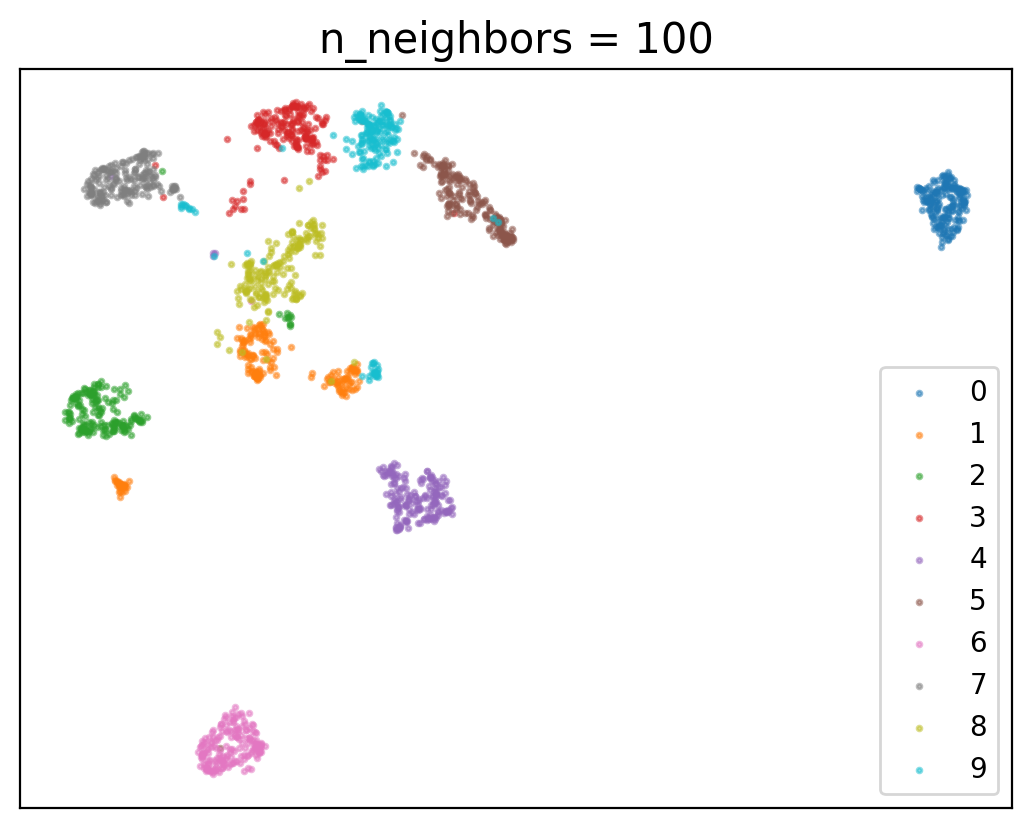

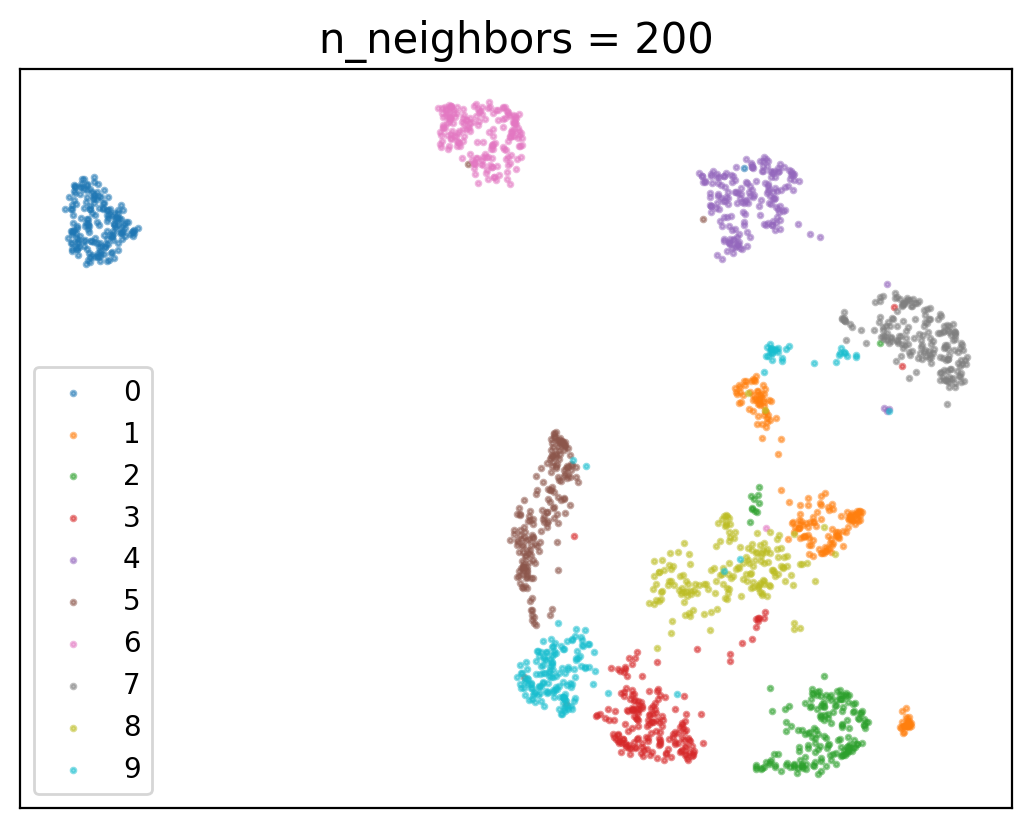

In [ ]:
%%time
for n in (2, 5, 10, 20, 50, 100, 200):
  draw_umap(n_neighbors=n, title=f'n_neighbors = {n}')

## `min_dist`を変更することの効果
* デフォルトの値は0.1

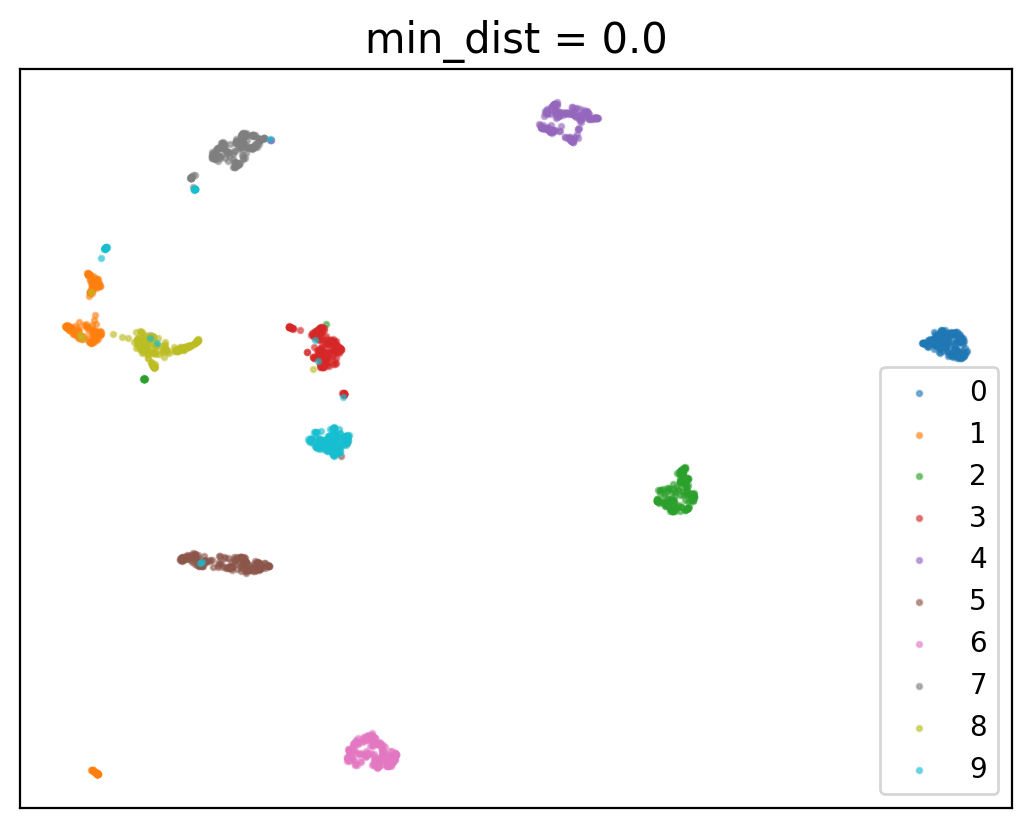

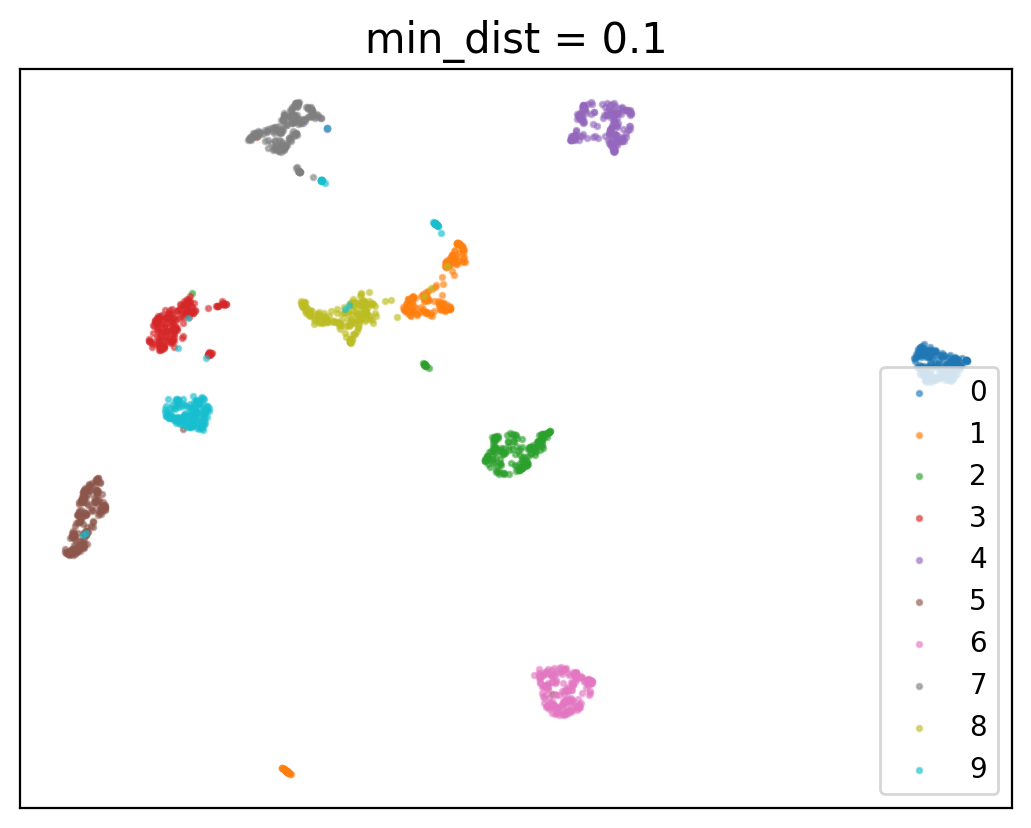

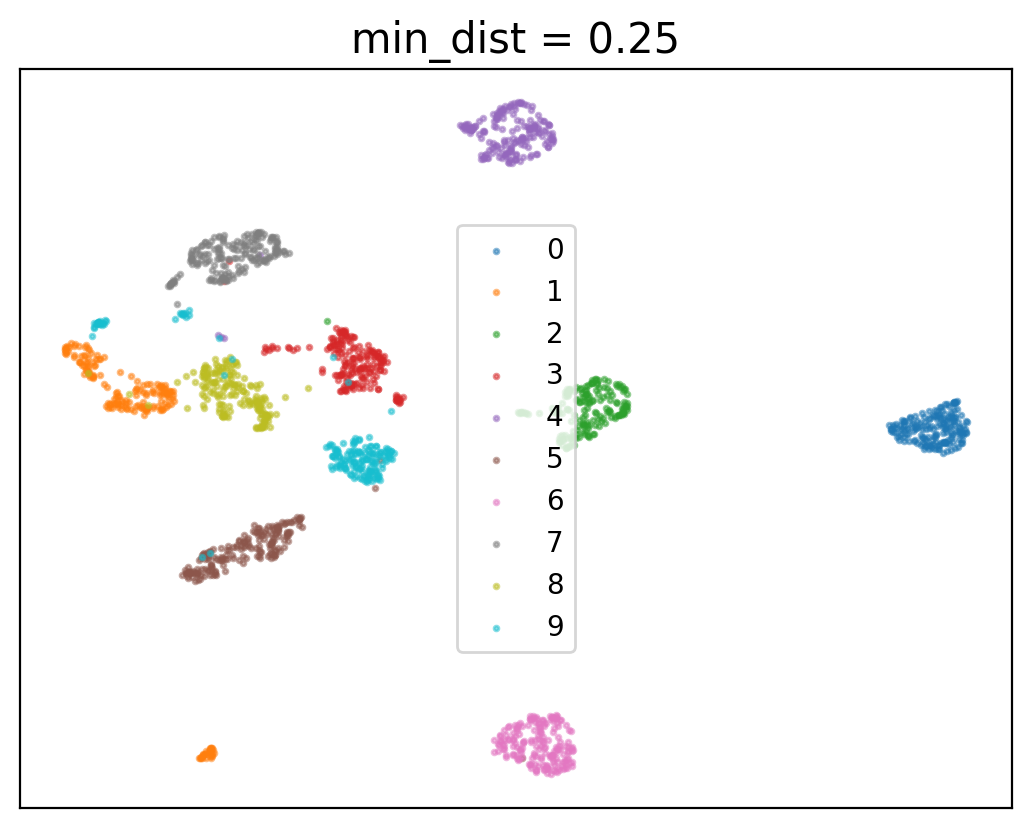

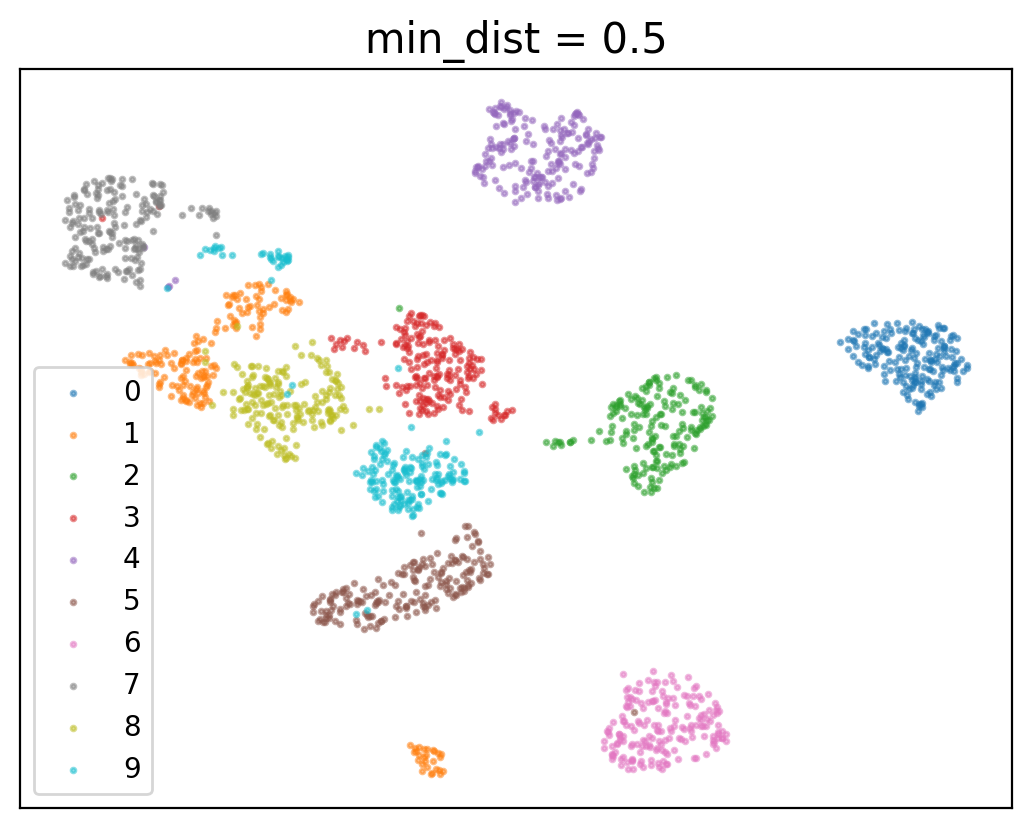

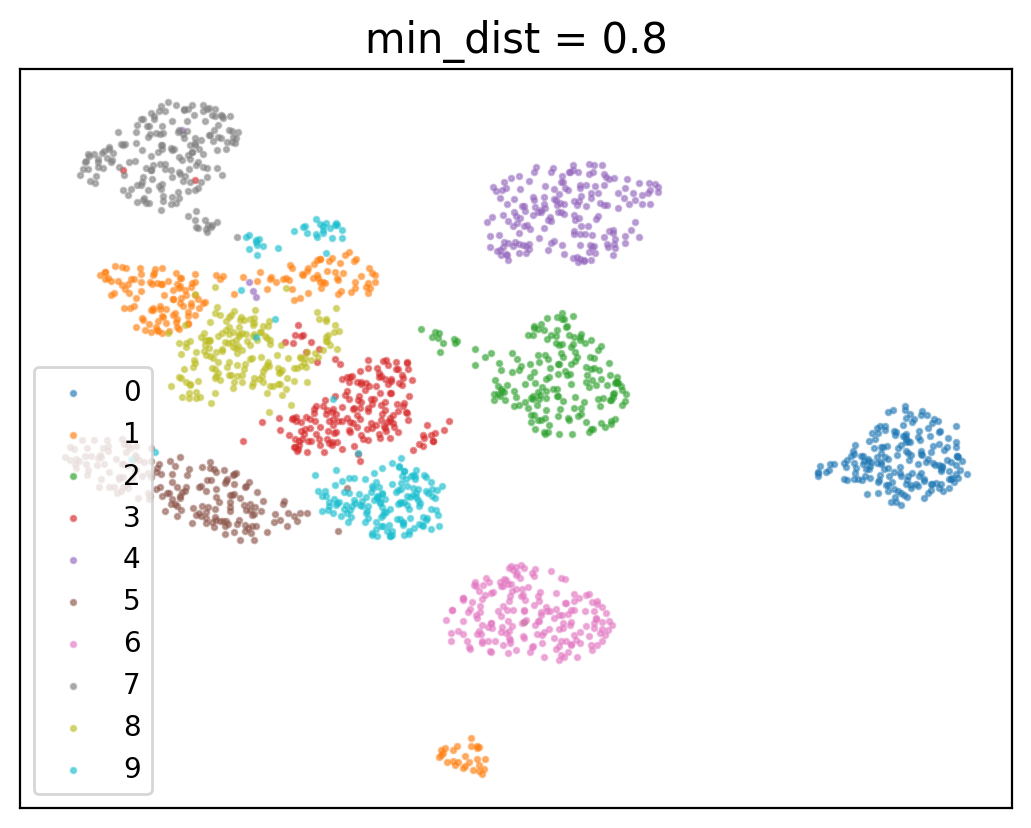

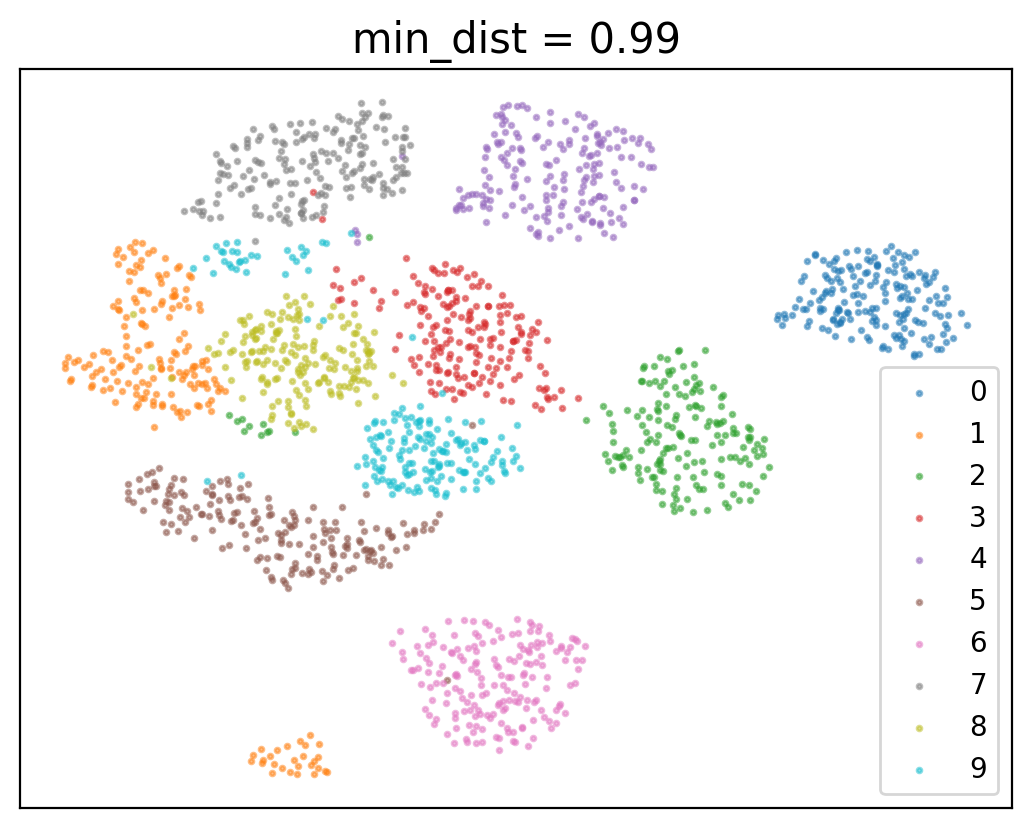

In [ ]:
for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
  draw_umap(min_dist=d, title=f'min_dist = {d}')

# t-SNE使用上の注意
* https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html
 * パラメータ`perplexity`を変えると可視化がどう変わるか。

## t-SNEのデフォルトの設定で可視化

In [ ]:
%%time
reducer = manifold.TSNE(random_state=42)
embedding = reducer.fit_transform(digits.data)

CPU times: user 23.5 s, sys: 153 ms, total: 23.7 s
Wall time: 15 s


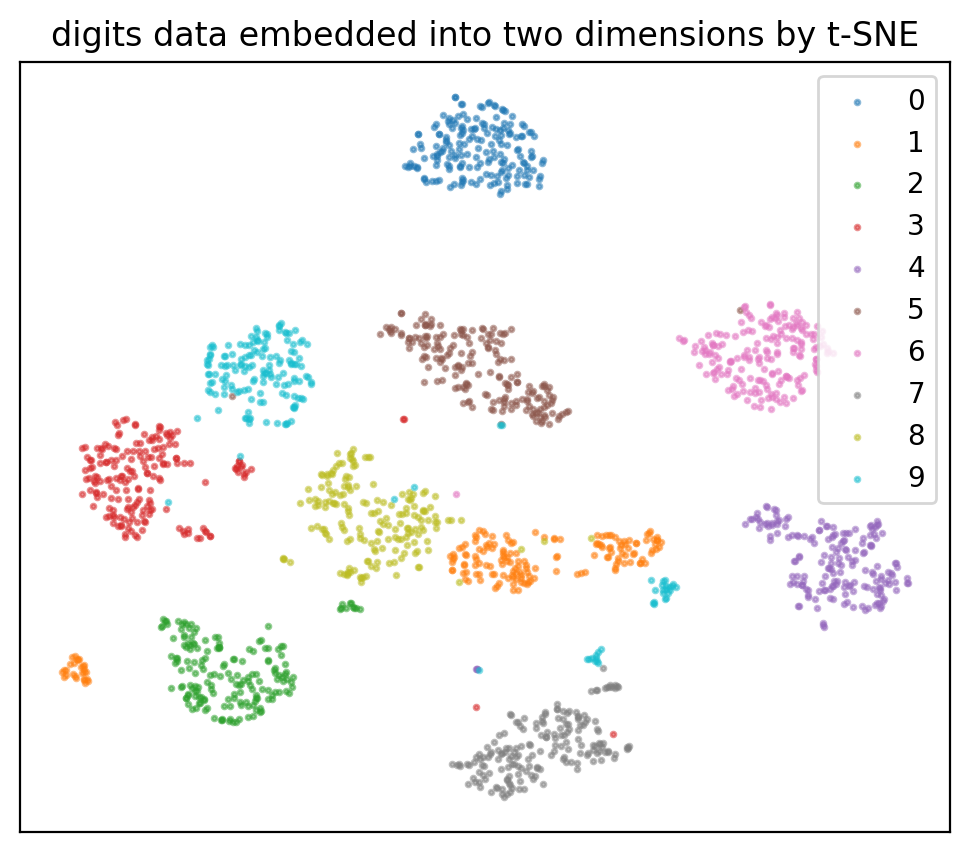

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))
scatter_plot(embedding, digits.target)
plt.setp(ax, xticks=[], yticks=[])
plt.legend()
plt.title("digits data embedded into two dimensions by t-SNE");

## `perplexity`を変更することの効果

In [ ]:
def draw_tsne(perplexity=30.0, title=''):
  reducer = manifold.TSNE(perplexity=perplexity)
  u = reducer.fit_transform(digits.data);
  fig = plt.figure()
  ax = fig.add_subplot(111)
  scatter_plot(u, digits.target, ax=ax)
  plt.setp(ax, xticks=[], yticks=[])
  plt.legend()
  plt.title(title, fontsize=15);

CPU times: user 2min 19s, sys: 718 ms, total: 2min 20s
Wall time: 1min 22s


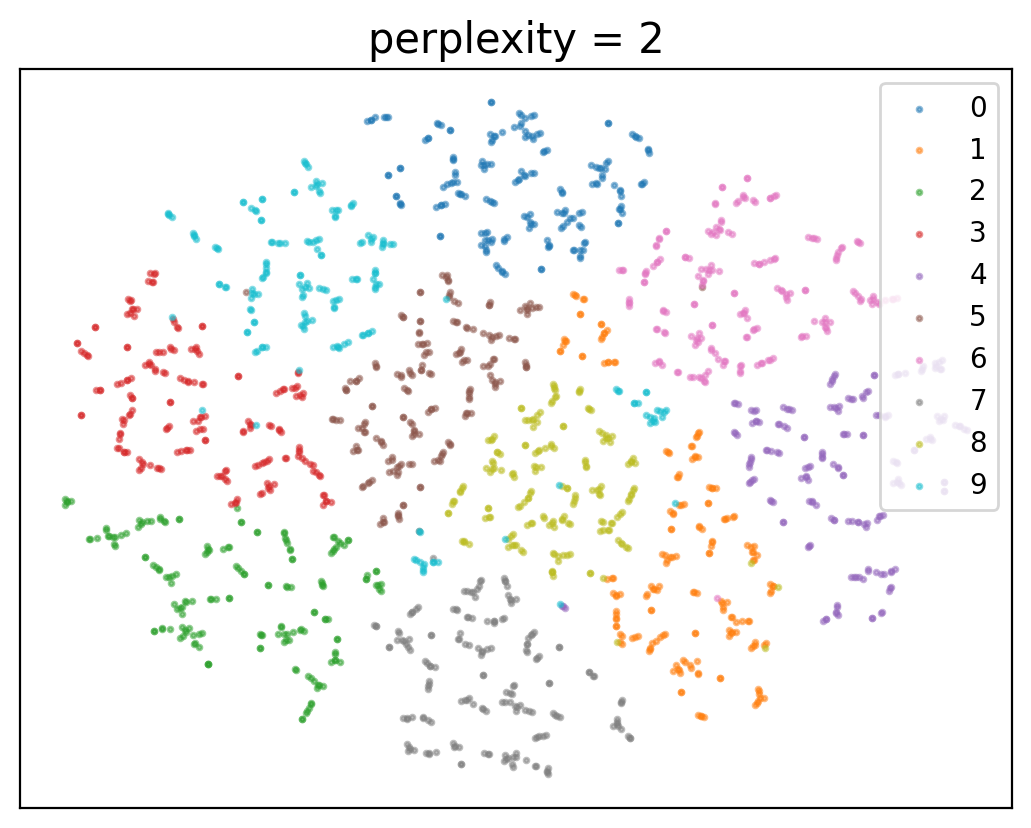

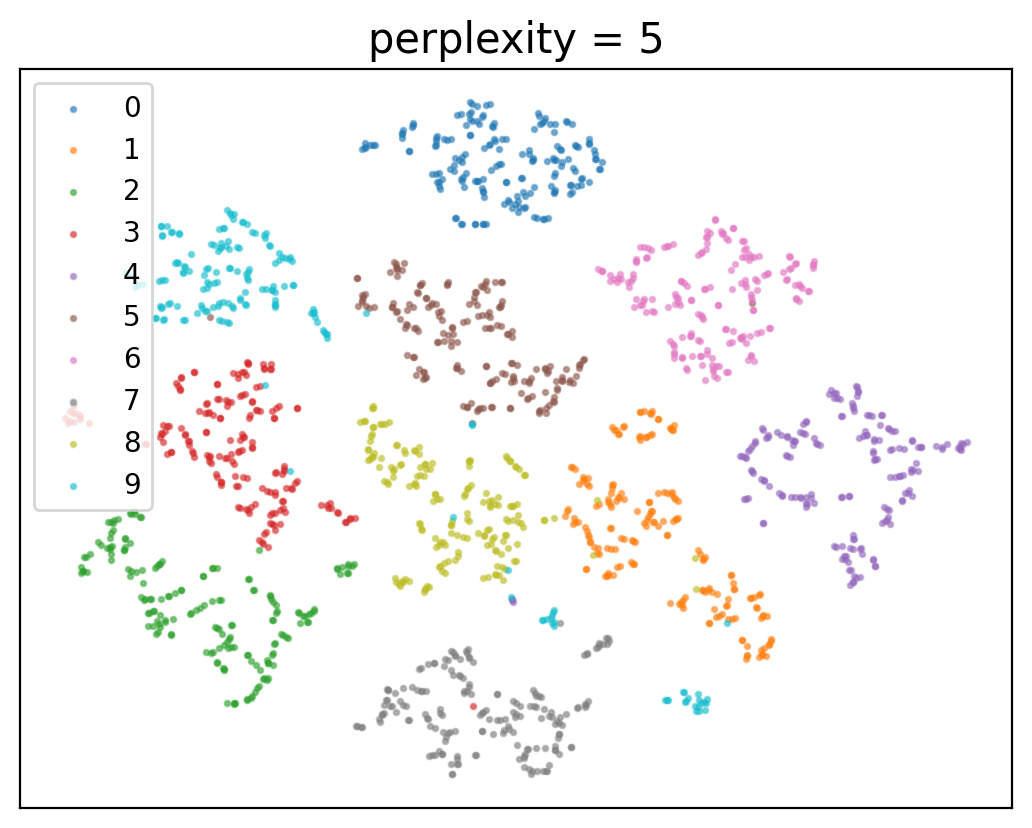

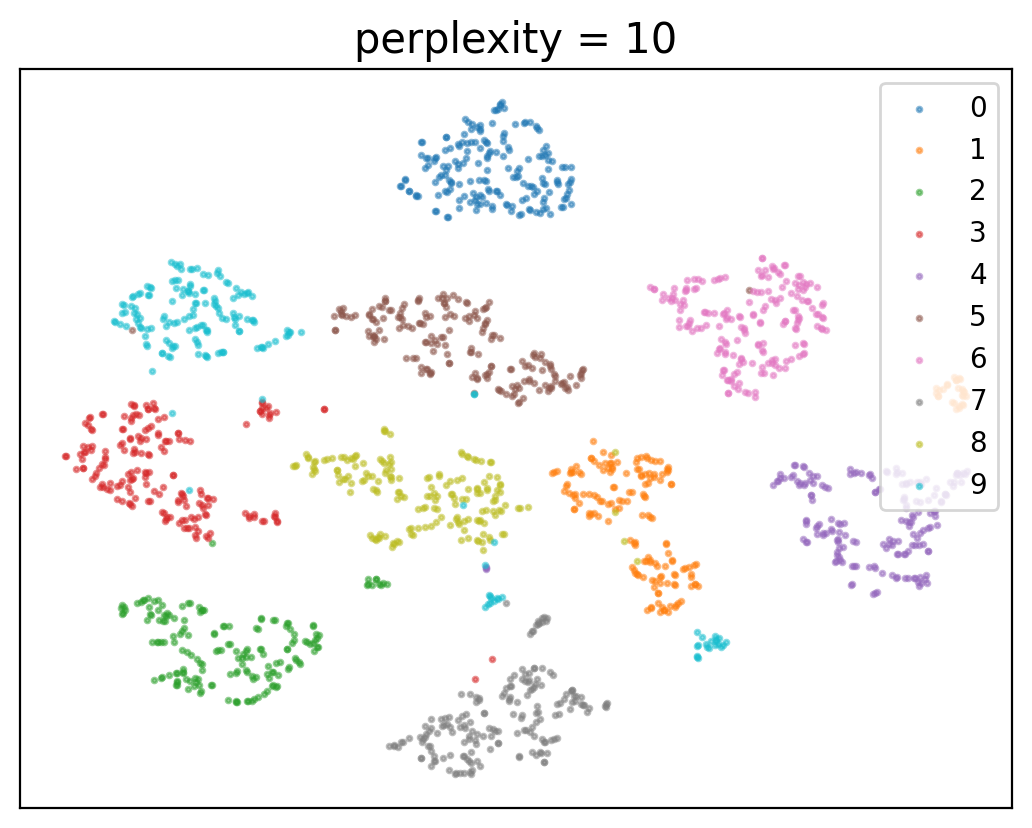

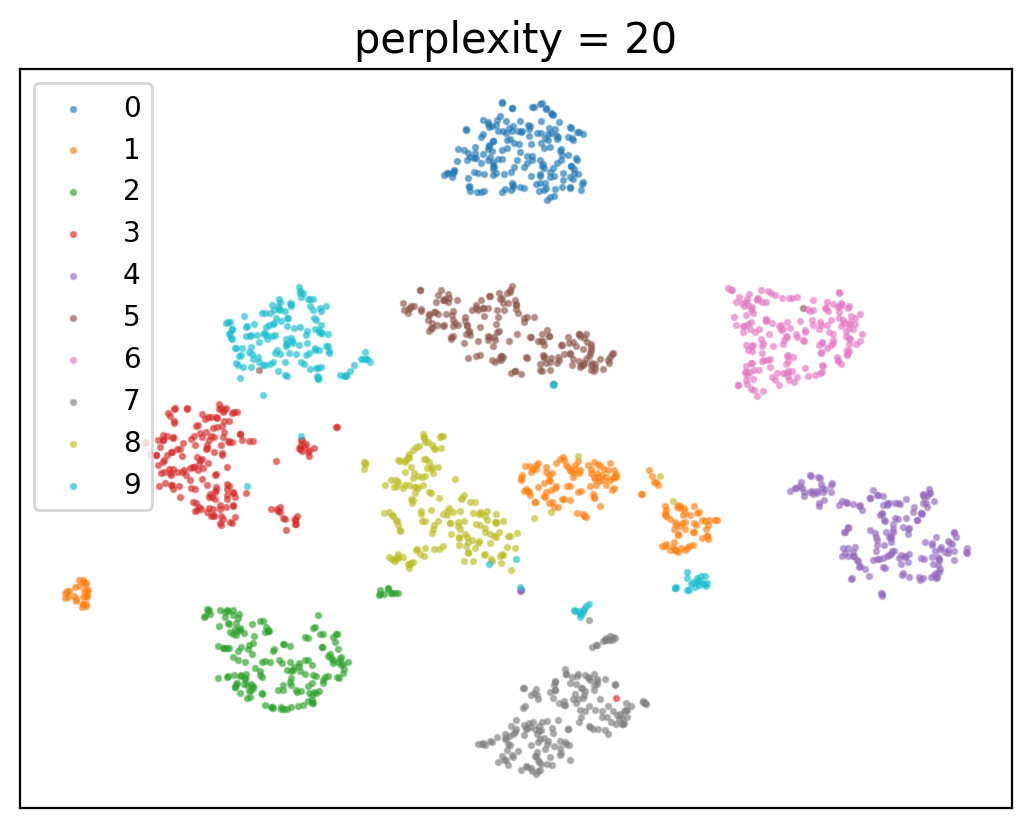

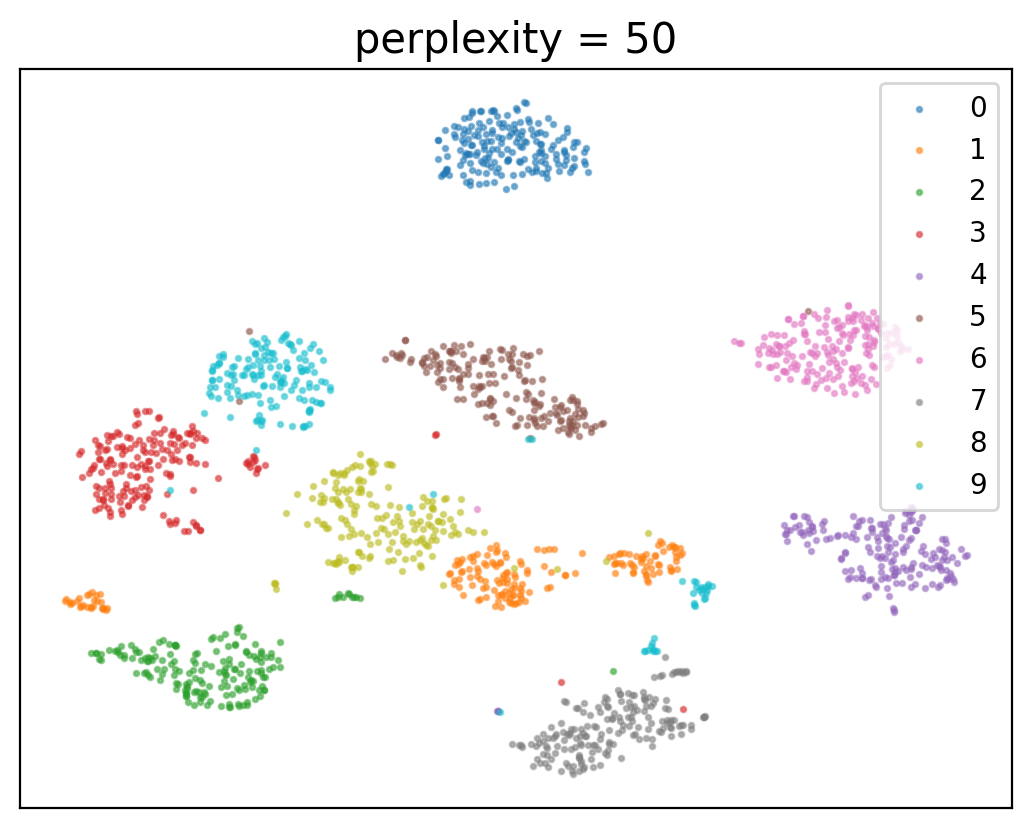

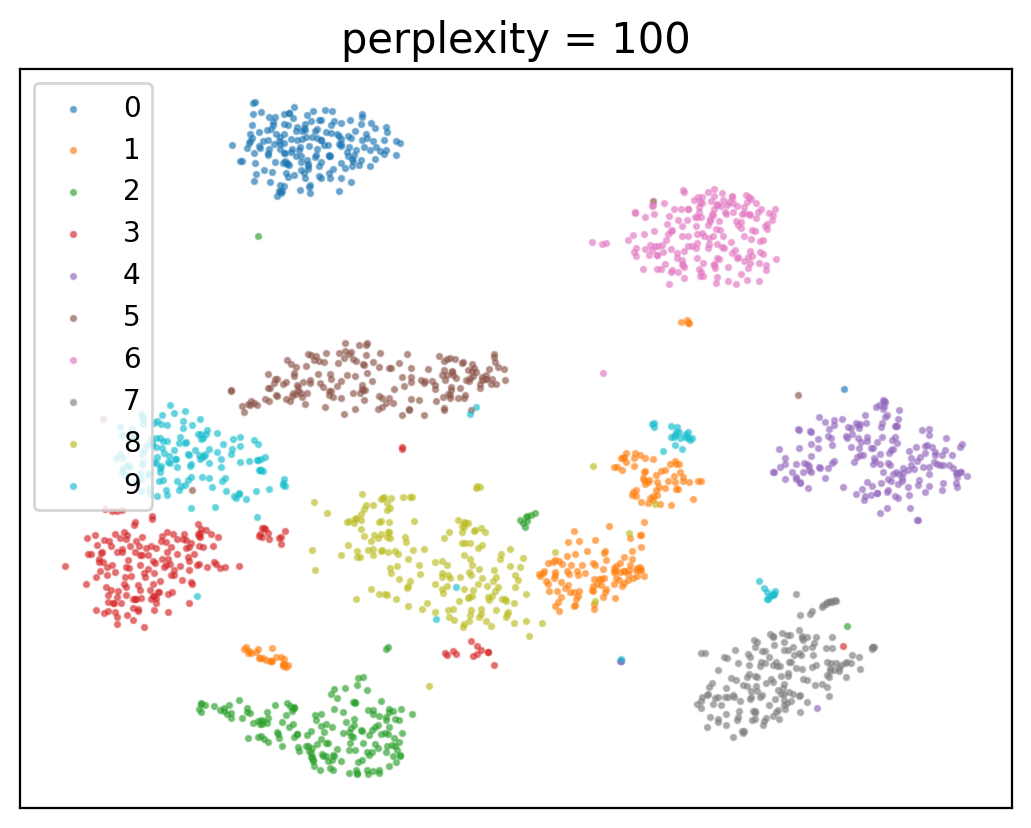

In [ ]:
%%time
for p in (2, 5, 10, 20, 50, 100):
  draw_tsne(perplexity=p, title=f'perplexity = {p}')

# 考察
* 可視化を常にデフォルトの設定で使っても構わないか？
* 2次元の可視化において遠いものは遠いと言っていいか？
* 2次元の可視化において近いものは近いと言っていいか？


# 助言
* 初めに結論ありきの"自分が見たいものだけを見る可視化"にならないように注意しよう。
* 最低限、複数の可視化手法（上に挙げたもの以外ならば、`sklearn.manifold.MDS`もお薦め。）を使い、共通して見られる特徴は何かを確認しよう。